# Testis 2 Explore Clusters

In [21]:
import os
import sys
from pathlib import Path
from itertools import zip_longest

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
sys.path.insert(0, '../lib')
from larval_gonad.notebook import Nb
from larval_gonad.plotting import make_figs, TSNEPlot
from larval_gonad.config import memory

# Setup notebook
nbconfig = Nb.setup_notebook('2018-03-27_testis2_explore_clusters', seurat_dir='../output/testis2_scRNAseq')

last updated: 2018-03-29 
Git hash: f801087de045aa9513181cc6ad771b9c12b12309


In [22]:
clusters = nbconfig.seurat.get_clusters()
tsne = nbconfig.seurat.get_tsne()
norm = nbconfig.seurat.get_normalized_read_counts()

In [23]:
_dat = clusters.join(tsne)

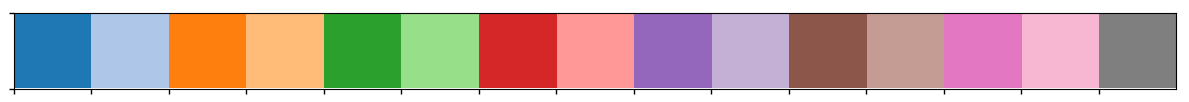

In [24]:
_colors = sns.color_palette('tab20', n_colors=15)
sns.palplot(_colors)

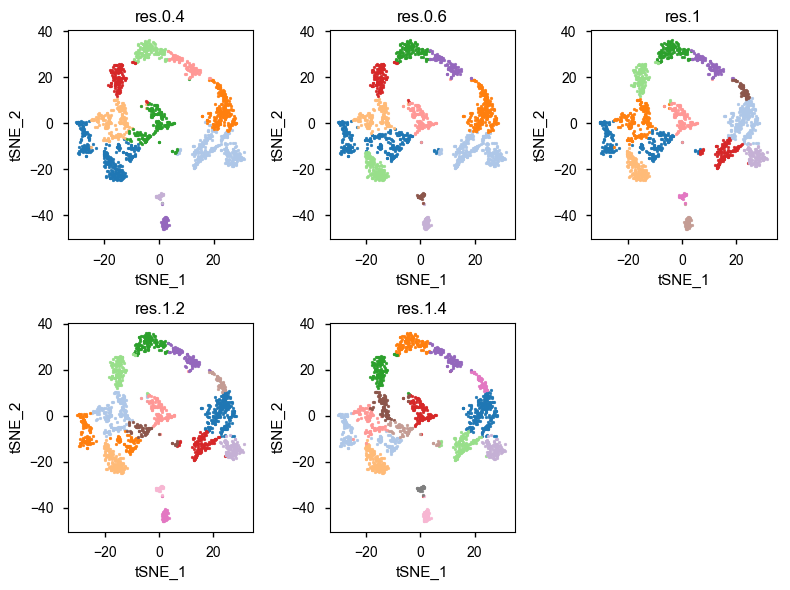

In [25]:
fig, axes = plt.subplots(2, 3)

for res, ax in zip_longest(clusters.columns, axes.flatten(), fillvalue=None):
    if res is None:
        ax.set_visible(False)
        continue
        
    TSNEPlot('tSNE_1', 'tSNE_2', _dat, 
             hue=res, palette=_colors,
             ax=ax, s=4
            )
    ax.legend_.remove()
    ax.set_title(res)
plt.tight_layout()

In [66]:
def _plot(gene, ax=None, **kwargs):
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    FBgn = nbconfig.symbol2fbgn[gene]
    TSNEPlot('tSNE_1', 'tSNE_2', tsne.join(norm.T[FBgn]), 
             hue=FBgn, cmap=sns.cubehelix_palette(rot=0, as_cmap=True), 
             vmin=0, vmax=2, ax=ax, **kwargs)
    ax.set_title(gene)

Text(0.5,1,'Testis 2')

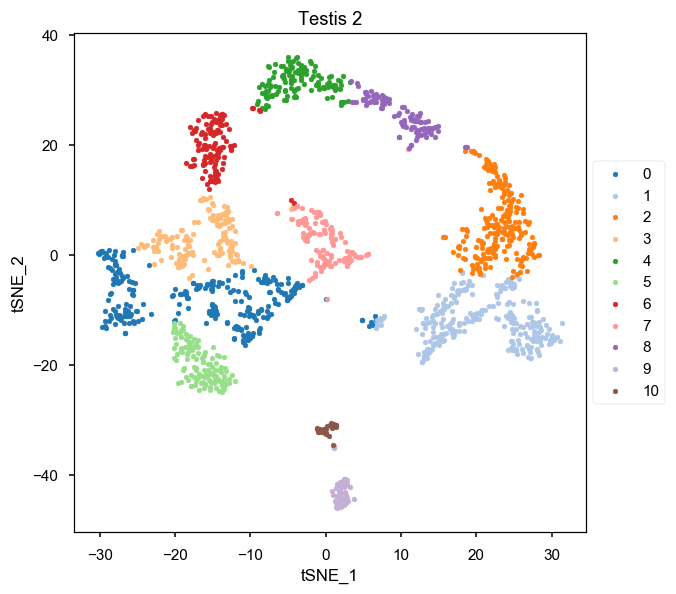

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6), dpi=110)
TSNEPlot('tSNE_1', 'tSNE_2', _dat,  hue='res.0.6', palette=_colors, s=10, ax=ax)
ax.set_title('Testis 2')

In [73]:
biomarkers = pd.read_csv(Path(nbconfig.seurat_dir, 'biomarkers_0.6.tsv'), sep='\t', index_col=[0, 1, 'cluster'])

In [74]:
biomarkers = biomarkers.query('p_val_adj <= 0.0001')\
    .sort_values('avg_logFC')\
    .sort_index(level='cluster')\

In [133]:
soma = [
    'tj',
    'ImpL2',
    'fru',
    'foxo',
    'CadN',
    'crp',
    'Nrt',
    'bnb',
    'gbb',
    'Fas3',
    'tkv',
    'Egfr',
    'Lar',
    'Sox100B',
    'cora',
    'spict',
    'ems',
    'fax',
    'egr',
    'vkg',
    'spi',
    'oys',
    'dsx',
    'nord'
]

In [129]:
biomarkers.query(f'gene_symbol in {soma}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0001090,bnb,1,1.151748e-13,0.542725,0.459,0.294,1.628111e-09
FBgn0014163,fax,1,7.611013e-93,1.213236,1.000,0.731,1.075893e-88
FBgn0000964,tj,2,1.084254e-67,0.473779,0.423,0.052,1.532701e-63
FBgn0001090,bnb,2,2.439568e-68,0.939925,0.773,0.249,3.448574e-64
FBgn0001257,ImpL2,2,3.020546e-84,1.085447,0.750,0.199,4.269843e-80
FBgn0004108,Nrt,2,5.278587e-57,0.650763,0.586,0.161,7.461810e-53
FBgn0014163,fax,2,1.013562e-64,1.039855,1.000,0.740,1.432771e-60
FBgn0033476,oys,3,2.585177e-36,0.386943,0.936,0.492,3.654406e-32
FBgn0000464,Lar,4,4.161706e-17,0.282147,0.527,0.216,5.882988e-13


In [135]:
early_germ = [
    'Phf7',
    'vas',
    'bam',
    'bgcn',
    'tut',
    'tej',
    'Rbp9',
    'hts',
    'mle',
    'Marf'
]

In [136]:
biomarkers.query(f'gene_symbol in {early_germ}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0031091,Phf7,3,2.077870e-36,0.334671,0.936,0.384,2.937277e-32
FBgn0000158,bam,4,4.817935e-12,0.260301,0.420,0.201,6.810633e-08
FBgn0010263,Rbp9,4,3.230264e-12,0.302489,0.481,0.272,4.566301e-08
FBgn0283442,vas,4,2.958375e-63,0.659089,0.817,0.230,4.181959e-59
FBgn0031091,Phf7,6,1.300931e-57,0.775717,0.921,0.396,1.838995e-53
FBgn0000158,bam,8,3.543702e-67,0.643777,0.820,0.179,5.009377e-63
FBgn0010263,Rbp9,8,4.835425e-21,0.257822,0.640,0.266,6.835356e-17
FBgn0031091,Phf7,8,2.143955e-29,0.573133,0.870,0.409,3.030695e-25
FBgn0033921,tej,8,5.829365e-19,0.253087,0.500,0.176,8.240391e-15


In [143]:
late_germ = [
    'aly',
    'mia',
    'CG3927',
    'sunz',
    'sowi',
    'soti',
    'c-cup',
    'd-cup',
    'wa-cup',
    'p-cup',
    'r-cup',
    'fzo',
]

In [138]:
biomarkers.query(f'gene_symbol in {late_germ}')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,
FBgn0011596,fzo,0,7.130942e-57,0.555742,0.801,0.357,1.008030e-52
FBgn0031367,c-cup,0,3.329176e-46,0.526548,0.830,0.508,4.706124e-42
FBgn0034739,CG3927,0,1.204551e-31,0.518208,0.889,0.584,1.702754e-27
FBgn0037460,sowi,0,1.229773e-70,0.805970,0.945,0.696,1.738406e-66
FBgn0037462,sunz,0,6.636959e-55,0.568142,0.815,0.419,9.382006e-51
FBgn0037502,wa-cup,0,1.424419e-42,0.429219,0.731,0.337,2.013558e-38
FBgn0038089,d-cup,0,1.843077e-53,0.494201,0.771,0.374,2.605373e-49
FBgn0038225,soti,0,5.279257e-82,1.036401,0.989,0.790,7.462758e-78
FBgn0031367,c-cup,3,2.125560e-24,0.388490,0.962,0.519,3.004692e-20


In [139]:
biomarkers.query(f'gene_symbol == "soronin"')

,,,p_val,avg_logFC,pct.1,pct.2,p_val_adj
primary_FBgn,gene_symbol,cluster,,,,,


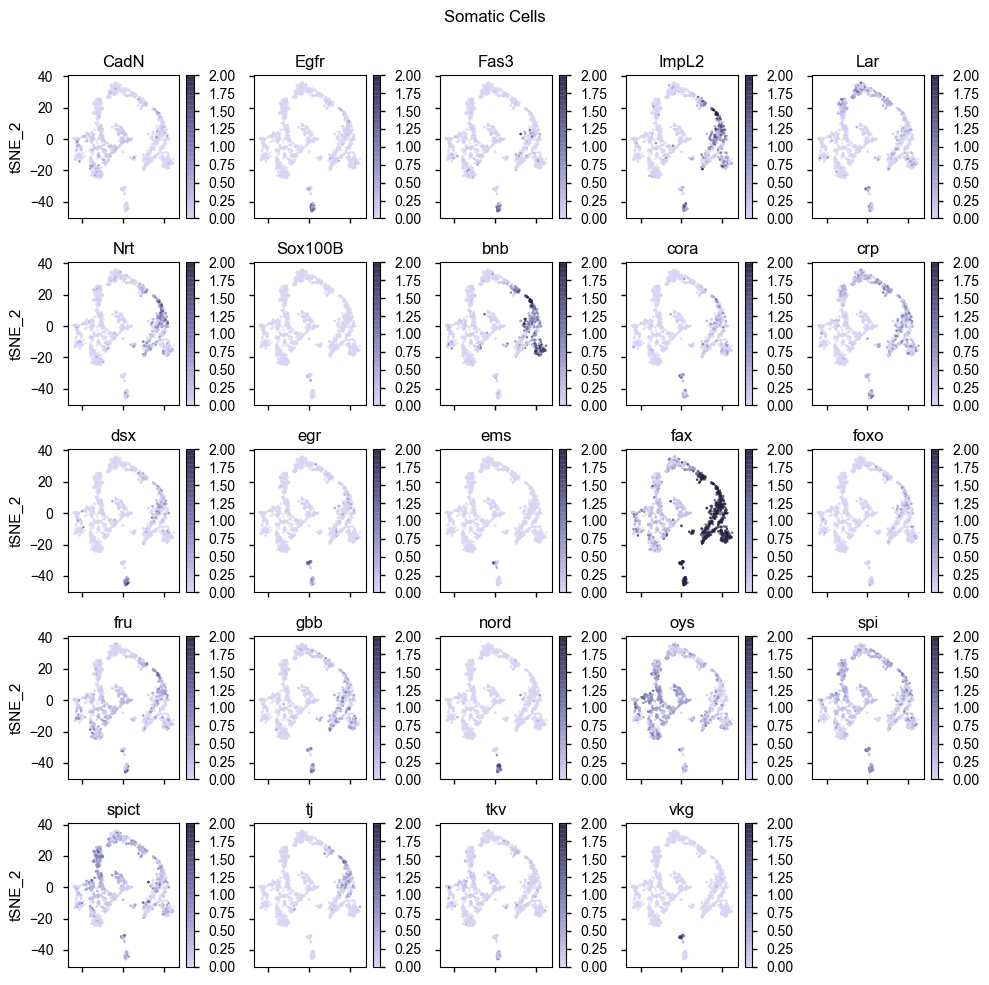

In [146]:
fig, axes = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10, 10))

for gene, ax in zip_longest(sorted(soma), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Somatic Cells')
plt.tight_layout(rect=[0, 0, 1, .95])

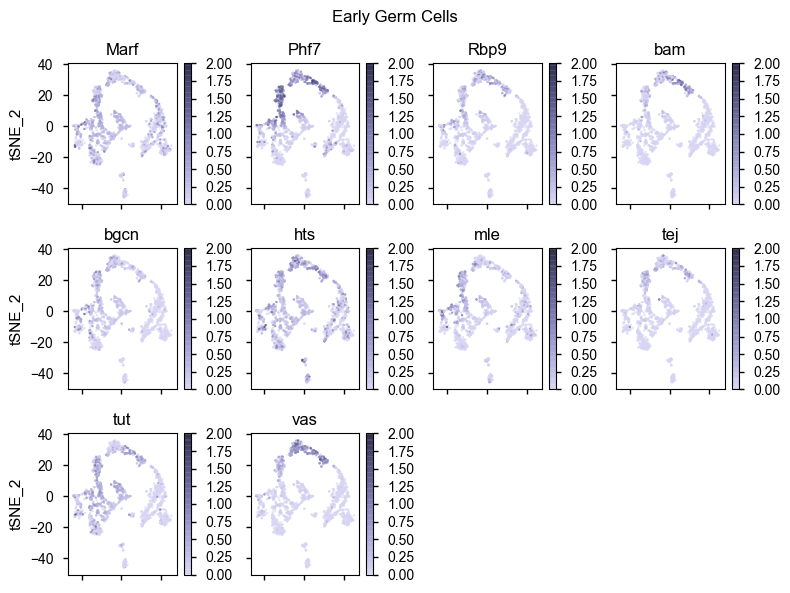

In [141]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

for gene, ax in zip_longest(sorted(early_germ), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Early Germ Cells')
plt.tight_layout(rect=[0, 0, 1, .95])

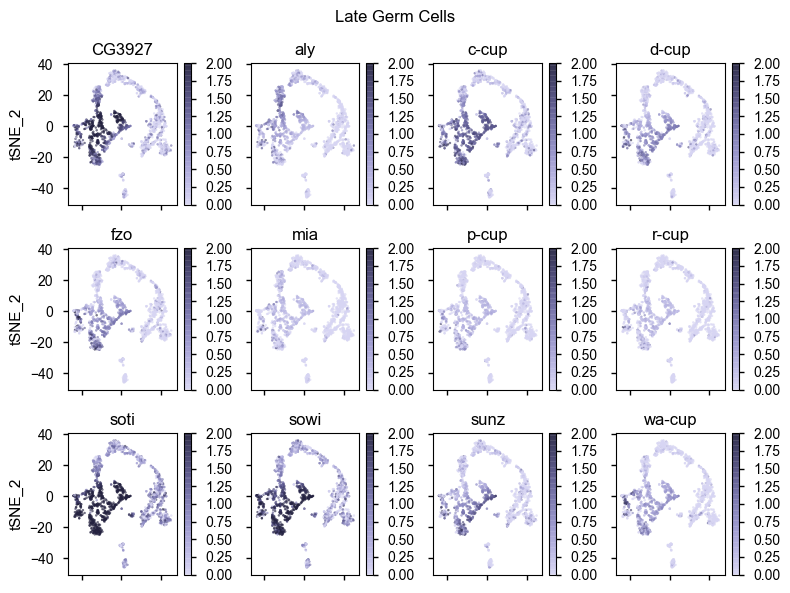

In [144]:
fig, axes = plt.subplots(3, 4, sharex=True, sharey=True)

for gene, ax in zip_longest(sorted(late_germ), axes.flatten(), fillvalue=None):
    if gene is None:
        ax.set_visible(False)
        continue
    _plot(gene, ax, s=2, alpha=.6)
    
plt.suptitle('Late Germ Cells')
plt.tight_layout(rect=[0, 0, 1, .95])